In [1]:
%matplotlib widget 

In [3]:
import pdb
import numpy as np

import json
import os
import re
import csv

anacor_path = '/dls/i23/data/2024/cm37273-1/processing/tihana/thaum_1/anacor'
csv_path    = '/dls/i23/data/2024/cm37273-1/processing/tihana/thaum_1/csv_files'
dials_path  = '/dls/science/groups/i23/tihana/just_dials/thaum_1'

data_list = []
for dataset_path in os.listdir(anacor_path):
    if os.path.isdir(os.path.join(anacor_path, dataset_path)) is True and dataset_path != '3p0_old':
        data_list.append(dataset_path)
dataset = dataset_path.split("/")
dataset = dataset[-1]
dataset_list = sorted(data_list)
print(dataset_list)

I_and_rmerge = []

for dir in (dataset_list):
    
    for target in ['ac','acsh', 'sh']:
        
        i = dataset_list.index(dir)
        if target == 'ac' or target == 'acsh':
            target_path = os.path.join(anacor_path, dir, f'{dir}_save_data','ResultData','dials_output',f'{dir}_{target}_log.log')
        elif target == 'sh':
            target_path = os.path.join(dials_path, dir, 'LogFiles','AUTOMATIC_DEFAULT_SCALE.log')
        
        if os.path.exists(target_path):
            print(f'{dir} {target} log  exists')
            with open(target_path, 'r') as file:
                lines = file.readlines()
        else:
            print(f'{dir} {target} log does not exist')
            break

        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '-------------Summary of merging statistics--------------' in line:
                start_index = i + 2#1
                
            elif 'Writing html report to ' in line:
                end_index = i - 1

        for line in lines[start_index:end_index]:
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()

            # Convert the columns to floats
            row_data = [col for col in columns]
            if row_data[0] == 'I/sigma':
                #I_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'\n{dir.replace("p",".")} :{target}: {float(row_data[1])} ')
            if row_data[0] == 'Rmerge(I)':
                #rmerge_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'{float(row_data[1])}')

        #print(f'{dir}, {target}, {I_list}, {rmerge_list}')
        #table_data.append(I_list)

dataset_filename = f'{csv_path}/thaum_1_I_and_r_merge.csv'#.format(target)
with open(dataset_filename, 'w') as dataset_file:
    writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
    writer.writerow(I_and_rmerge)
    

['3p0', '3p5', '4p0', '4p5']
3p0 ac log  exists
3p0 acsh log  exists
3p0 sh log  exists
3p5 ac log  exists
3p5 acsh log  exists
3p5 sh log  exists
4p0 ac log  exists
4p0 acsh log  exists
4p0 sh log  exists
4p5 ac log  exists
4p5 acsh log  exists
4p5 sh log  exists


/tmp/ipykernel_43494/2099553841.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['energy', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


    energy  method  I_value  r_value
0      3.0    :ac:     18.5    0.146
1      3.0  :acsh:     26.7    0.099
2      3.0    :sh:     20.4    0.120
3      3.5    :ac:     25.4    0.104
4      3.5  :acsh:     31.1    0.076
5      3.5    :sh:     29.0    0.085
6      4.0    :ac:     22.4    0.114
7      4.0  :acsh:     17.1    0.083
8      4.0    :sh:     16.4    0.091
9      4.5    :ac:     24.0    0.101
10     4.5  :acsh:     16.3    0.078
11     4.5    :sh:     15.9    0.084


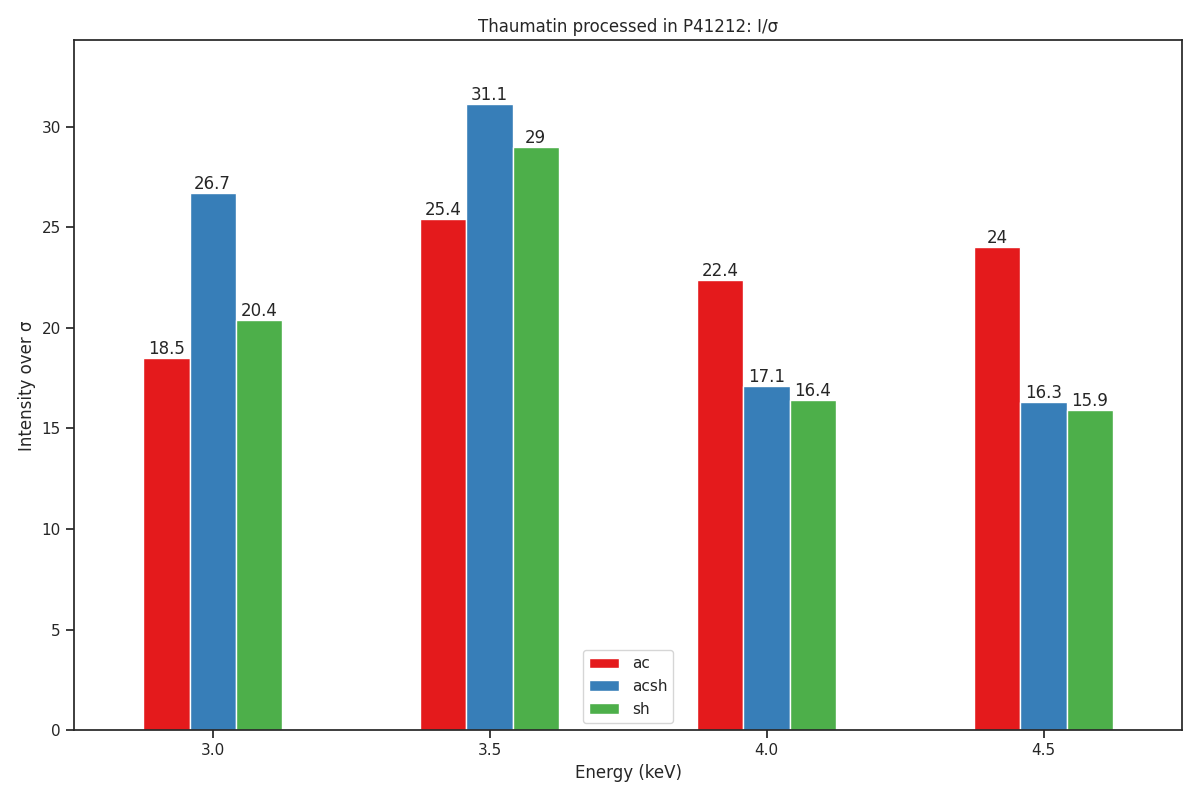

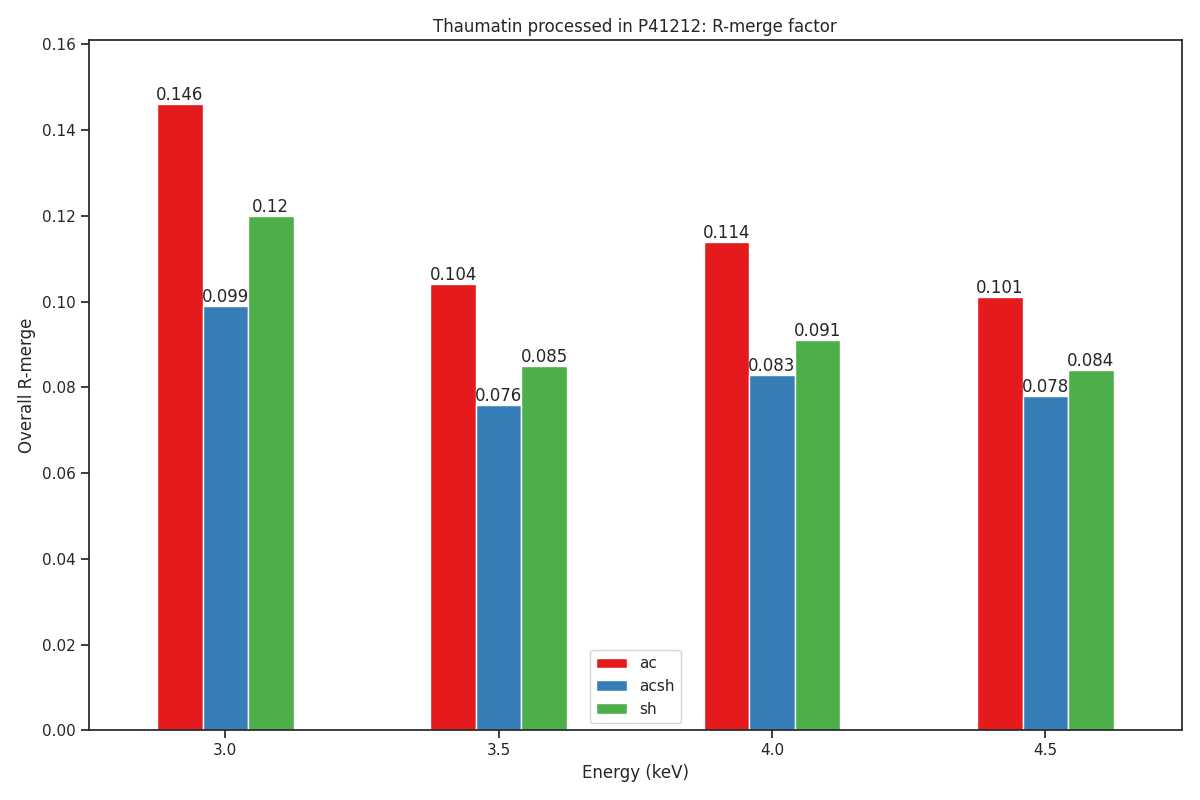

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/thaum_1/csv_files/thaum_1_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['energy', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
# Melting the combined DataFrame
#melted_combined_data = combined_data#.melt(id_vars=['set_id', 'method'], value_name='value')#var_name='method', value_name='value')
#filtered_combined_data = melted_combined_data#.dropna(subset=['value'])

print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

# ac = filtered_combined_data[filtered_combined_data['method'].str.contains(':ac:')]
# acsh = filtered_combined_data[filtered_combined_data['method'].str.contains('acsh')]
# sh = filtered_combined_data[filtered_combined_data['method'].str.contains(':sh:')]

sns.set_style("whitegrid")#darkgrid
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['energy']))
ax = ax.plot(kind='bar', legend=True, figsize=(12,8))
ax.legend(loc='lower center')
plt.title(f'Thaumatin processed in P41212: I/σ')
plt.xlabel('Energy (keV)')
plt.ylabel('Intensity over σ')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/thaum_1/plots/I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp0/thaum_Isig.png', dpi=300)
plt.show()


sns.set_style("whitegrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['energy']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(12,8))
ax2.legend(loc='lower center')
#plt.grid()
plt.title(f'Thaumatin processed in P41212: R-merge factor')
plt.xlabel('Energy (keV)')
plt.ylabel('Overall R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container)
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/thaum_1/plots/rmerges.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp0/thaum_rmerges.png', dpi=300)
plt.show()